In [2]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("/home/whf/111.png")

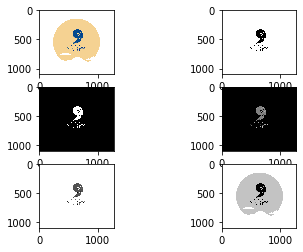

In [3]:
src = cv2.imread("/home/whf/111.png", cv2.IMREAD_UNCHANGED)
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

#灰度图像处理
GrayImage = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#二进制阈值化处理
r1, b1 = cv2.threshold(GrayImage, 127, 255, cv2.THRESH_BINARY)

#反二进制阈值化处理
r2, b2 = cv2.threshold(GrayImage, 127, 255, cv2.THRESH_BINARY_INV)

 
#截断阈值化处理
r3, b3 = cv2.threshold(GrayImage, 127, 255, cv2.THRESH_TRUNC)


#反阈值化为0处理
r4, b4 = cv2.threshold(GrayImage, 127, 255, cv2.THRESH_TOZERO_INV)

#阈值化为0处理
r5, b5 = cv2.threshold(GrayImage, 127, 255, cv2.THRESH_TOZERO)


plt.subplot(3,2,1)
plt.imshow(src)
plt.subplot(3,2,2)
plt.imshow(255-b1,cmap=plt.cm.gray_r)
plt.subplot(3,2,3)
plt.imshow(255-b2,cmap=plt.cm.gray_r)
plt.subplot(3,2,4)
plt.imshow(b3,cmap=plt.cm.gray_r)
plt.subplot(3,2,5)
plt.imshow(b4,cmap=plt.cm.gray_r)
plt.subplot(3,2,6)
plt.imshow(255-b5,cmap=plt.cm.gray_r)

In [4]:
img=GrayImage
b6 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
 
b7 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
ret, b8 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

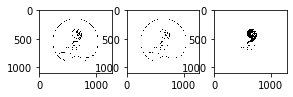

In [5]:
plt.figure(2)
plt.subplot(1,4,1)
plt.imshow(b6,'gray')
plt.subplot(1,4,2)
plt.imshow(b7,'gray')
plt.subplot(1,4,3)
plt.imshow(b8,'gray')

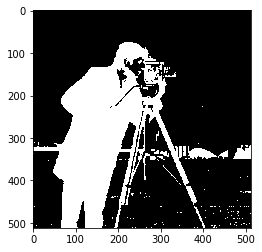

In [2]:
from skimage import data,filters
import matplotlib.pyplot as plt
image = data.camera()
thresh = filters.threshold_otsu(image)   #返回一个阈值
dst =(image <= thresh)*1.0   #根据阈值进行分割
plt.imshow(dst,plt.cm.gray)

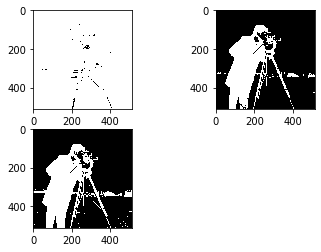

In [4]:
thresh1 = filters.threshold_yen(image) 
thresh2 = filters.threshold_li(image)
thresh3 = filters.threshold_isodata(image)

dst1 =(image <= thresh1)*1.0 
dst2 =(image <= thresh2)*1.0 
dst3 =(image <= thresh3)*1.0 
plt.subplot(221)
plt.imshow(dst1,plt.cm.gray)
plt.subplot(222)
plt.imshow(dst2,plt.cm.gray)
plt.subplot(223)
plt.imshow(dst3,plt.cm.gray)

In [5]:
dst4 =filters.threshold_adaptive(image, 15,'mean') #返回一个阈值图像
dst5 =filters.threshold_adaptive(image, 15,'genssian') #返回一个阈值图像
dst6 =filters.threshold_adaptive(image, 15,'generic') #返回一个阈值图像
dst7 =filters.threshold_adaptive(image, 15,'median') #返回一个阈值图像

plt.subplot(221)
plt.imshow(dst4,plt.cm.gray)
plt.subplot(222)
plt.imshow(dst5,plt.cm.gray)
plt.subplot(223)
plt.imshow(dst6,plt.cm.gray)

AttributeError: module 'skimage.filters' has no attribute 'threshold_adaptive'

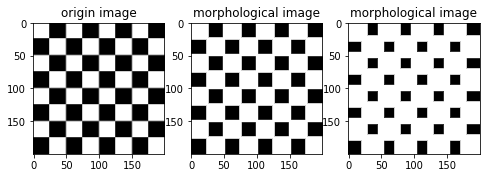

In [9]:
#形态学滤波

import skimage.morphology as sm
img=data.checkerboard()
dst1=sm.dilation(img,sm.square(5))  #用边长为5的正方形滤波器进行膨胀滤波
dst2=sm.dilation(img,sm.disk(5))  #用边长为15的正方形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

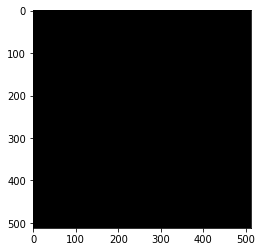

In [12]:
#morphology.square: 正方形
#morphology.disk:  平面圆形
#morphology.ball: 球形
#morphology.cube: 立方体形
#morphology.diamond: 钻石形
#morphology.rectangle: 矩形
#morphology.star: 星形
#morphology.octagon: 八角形
#morphology.octahedron： 八面体


dsik4=sm.binary_dilation(image, selem=None)
plt.imshow(dsik4,plt.cm.gray)

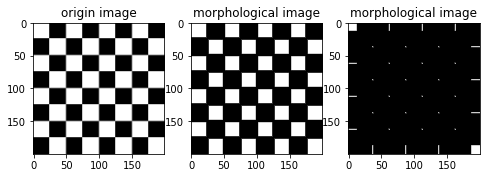

In [13]:
#腐蚀性
img=data.checkerboard()
dst1=sm.erosion(img,sm.square(5))  #用边长为5的正方形滤波器进行膨胀滤波
dst2=sm.erosion(img,sm.square(25))  #用边长为25的正方形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

(-0.5, 199.5, 199.5, -0.5)

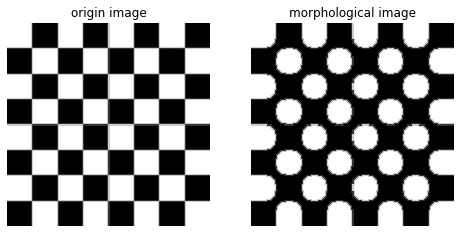

In [16]:
#开运算

from skimage import io,color
import skimage.morphology as sm
import matplotlib.pyplot as plt
img=color.rgb2gray(img)
dst=sm.opening(img,sm.disk(9))  #用边长为9的圆形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

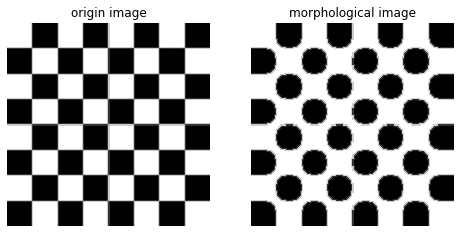

In [17]:
#闭运算

dst=sm.closing(img,sm.disk(9))  #用边长为5的圆形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')

(-0.5, 199.5, 199.5, -0.5)

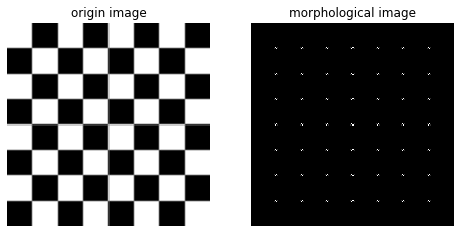

In [18]:
#黑帽
dst=sm.black_tophat(img,sm.square(21))  

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)
plt.axis('off')

plt.subplot(122)
plt.title('morphological image')
plt.imshow(dst,plt.cm.gray)
plt.axis('off')